In [1]:
#import hdbscan  # conda install -c conda-forge hdbscan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [7]:
# Specify K
number_of_cluster = 2

# Define the maximum number of iterations
max_iter = 1000  # This is used for the function called "KMeans"

# Define hyper-parameters for the DBSCAN algorithm
dbscan_eps = 0.025
dbscan_min_sample = 15

# Define hyper-parameters for the HDBSCAN algorithm
hdbscan_min_cluster_size = 15
hdbscan_min_sample = 10


In [8]:

data = pd.read_csv('Data_5.csv')

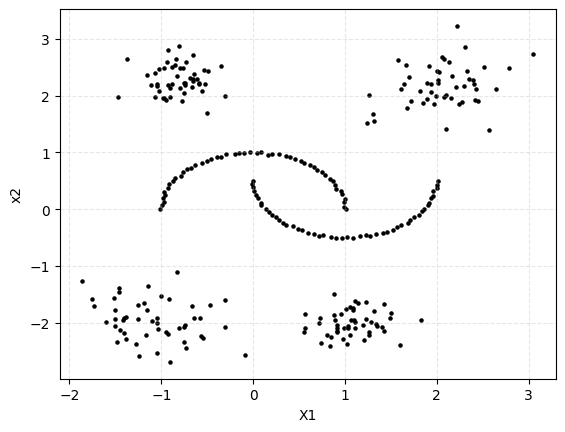

In [9]:
# Visualize data
#plt.scatter(x[0], x[:,1], marker='o', color='black', s=10, label='Data 1')
plt.scatter(data['x1'], data['x2'], marker='.', color='black', s=20)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('x2', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
#plt.savefig('Data_visualization', dpi=250, bbox_inches="tight")
plt.show()


In [10]:
data_array = np.column_stack([data['x1'],data['x2']])

In [11]:
 # Implement the K-means algorithm
kmeans_algorithm = KMeans (n_clusters=number_of_cluster, random_state=0).fit(data_array)
kmeans_labels = kmeans_algorithm. labels_
kmeans_cluster_center = kmeans_algorithm.cluster_centers_

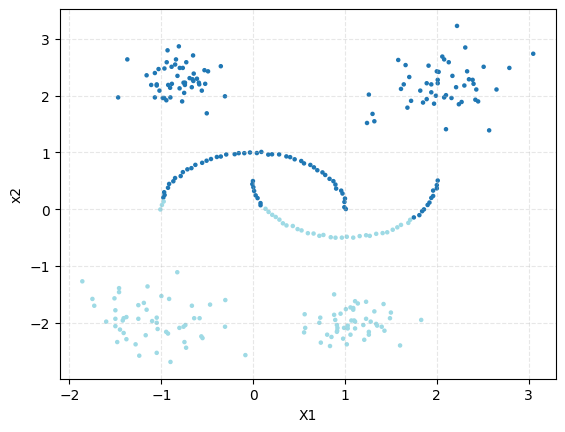

In [12]:
# Visualize the results of the K-Means algorithm
plt.scatter(data['x1'], data['x2'], c=kmeans_labels, marker='.', cmap='tab20', s=20) # N
plt.xlabel('X1', fontsize = 10)
plt.ylabel('x2', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
#plt.savefig('Results K-Means_algorithm', dpi=250, bbox_inches="tight")
plt.show()

In [19]:
dbscan_eps=0.1
dbscan_min_sample = 1

In [20]:
data_array = np.column_stack([data['x1'],data['x2']])

In [21]:
from sklearn.cluster import DBSCAN
dbscanAlg = DBSCAN(eps = dbscan_eps,min_samples=dbscan_min_sample,metric='euclidean',algorithm='ball_tree').fit(data_array)
labels = dbscanAlg.labels_

In [22]:
dbscan_clusters = len(set(labels))-(1 if -1 in labels else 0)
dbscan_clusters

108

In [23]:
dbscan_noise = list(labels).count(-1)
dbscan_noise

0

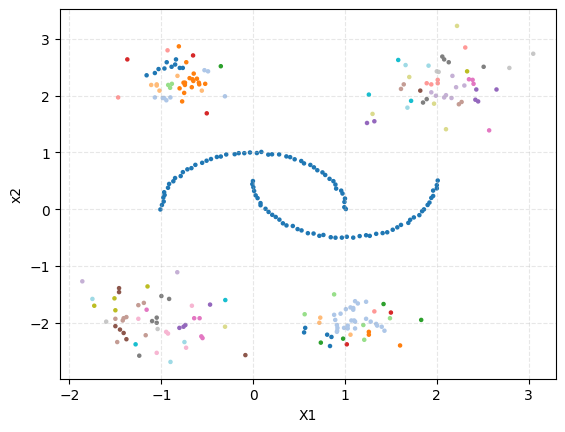

In [24]:
# Visualize the results of the K-Means algorithm
plt.scatter(data['x1'], data['x2'], c=labels, marker='.', cmap='tab20', s=20) # N
plt.xlabel('X1', fontsize = 10)
plt.ylabel('x2', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
#plt.savefig('Results K-Means_algorithm', dpi=250, bbox_inches="tight")
plt.show()